In [129]:
import numpy as np
import pandas as pd
import scipy as scp

import statsmodels

import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats, linalg
from statsmodels.formula.api import ols

/home/lukas/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [140]:
data_df = pd.read_csv('../data/pregnancy.dat', delim_whitespace=True)
data_df

,Protein,Gestation
0,0.38,11
1,0.58,12
2,0.51,13
3,0.38,15
4,0.58,17
5,0.67,18
6,0.84,19
7,0.56,21
8,0.78,22
9,0.86,25


In [114]:
data_df.describe()

,Protein,Gestation
count,19.00000,19.000000
mean,0.75000,24.000000
std,0.21881,8.232726
min,0.38000,11.000000
25%,0.58000,17.500000
50%,0.78000,25.000000
75%,0.89000,30.500000
max,1.18000,36.000000


In [115]:
print(plt.style.available)

['seaborn-white', 'seaborn-paper', 'classic', 'seaborn-bright', 'grayscale', 'seaborn-talk', 'seaborn-dark', '_classic_test', 'seaborn-whitegrid', 'bmh', 'seaborn-muted', 'seaborn-notebook', 'seaborn-ticks', 'ggplot', 'seaborn-darkgrid', 'seaborn-colorblind', 'seaborn-poster', 'dark_background', 'seaborn', 'seaborn-dark-palette', 'seaborn-pastel', 'fivethirtyeight', 'seaborn-deep']


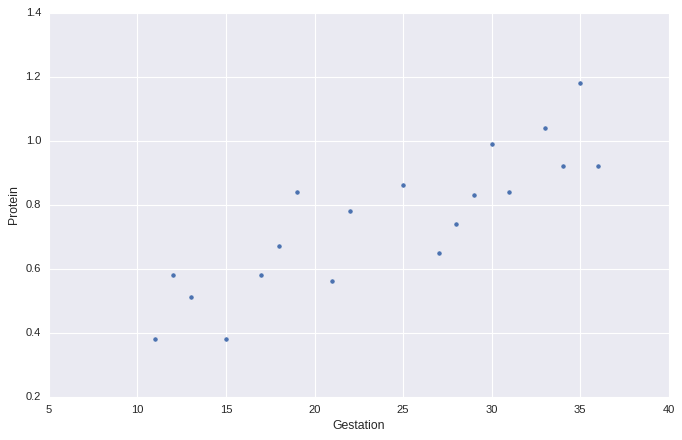

In [116]:
data_df.plot(x='Gestation', y='Protein', kind='scatter', figsize=(10,6), fontsize=10, style=plt.style.use('seaborn'))

In [133]:
model_1 = stats.linregress(data_df.Gestation, data_df.Protein)
r_squared = model.rvalue ** 2

print('{0}\nR^2: {1}'.format(model_1, r_squared))

LinregressResult(slope=0.022844262295081966, intercept=0.20173770491803278, rvalue=0.8595156891894367, pvalue=2.415694209175882e-06, stderr=0.003294675944222447)
R^2: 0.7387672199627923


In [118]:
a = [[1, g] for g in data_df.Gestation] 
b = [[p] for p in data_df.Protein]

beta, rss, rank, sigma = linalg.lstsq(a, b)
tss = rss / (1-r_squared)
mss = tss - rss

print('RSS: {0}\nTSS: {1}\nMSS: {2}'.format(rss, tss, mss))

RSS: [0.22513041]
TSS: [0.8618]
MSS: [0.63666959]


In [170]:
model_2 = ols('Protein ~ Gestation', data_df).fit()

In [173]:
anova_table = sm.stats.anova_lm(model_2, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Gestation,0.63667,1.0,48.07606,0.000002
Residual,0.22513,17.0,NaN,NaN


In [174]:
anova_table['mean_sq'] = anova_table.sum_sq / anova_table.df
anova_table = anova_table[anova_table.columns[[1,0,4,2,3]]] # re-arranging collumns so as to look indentical to the lecture notes
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Gestation,1.0,0.63667,0.636670,48.07606,0.000002
Residual,17.0,0.22513,0.013243,NaN,NaN
